# AWS Re:Invent  Autogluon Workshop
### This workshop will demonstrate a machine learning problem solved by autogluon.
* The problem we want to solve in this tutorial is Shopee clothes labeling. The problem is exctracted from [this kaggle competition](https://www.kaggle.com/datasets/gpiosenka/sports-classification)
* Use the documentation of autogluon and the different tutorials [here](https://auto.gluon.ai/stable/index.html).

In [5]:
# installation of needed librairies.
!pip3 install -U pip
!pip3 install -U setuptools wheel

# Install the proper version of PyTorch following https://pytorch.org/get-started/locally/
!pip3 install torch==1.12.0+cu113 torchvision==0.13.0+cu113 torchtext==0.13.0 --extra-index-url https://download.pytorch.org/whl/cu113
!pip3 install "mxnet_cu101<2.0.0, >=1.7.0"
!pip3 install "mxnet-cu102<2.0.0"
!pip3 install "gluoncv>=0.5.0,<0.9.0"
!pip3 uninstall horovod --yes
!pip3 install --no-cache-dir horovod
!pip3 install llvmlite --ignore installed
!pip3 install autogluon

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com, https://download.pytorch.org/whl/cu113
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Found existing installation: horovod 0.26.1
Uninstalling horovod-0.26.1:
  Successfully uninstalled horovod-0.26.1
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 254.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for horovod: filename=horovod-0.26.1-cp38-cp38-linux_x86_64.whl size=14457624 sha256=2bd2a68fea4d00da736c30b6fe952e18a86

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
print(torch.version.cuda)

11.3


In [4]:
# import autogluon tools.
import autogluon
import autogluon.core as ag
from autogluon.vision import ImageDataset, ImagePredictor

import pandas as pd

ModuleNotFoundError: No module named 'autogluon'

In [4]:
csv_file = 'Datasets/sports.csv'
df = pd.read_csv(csv_file)
df.head()

filepaths      labels data set
0  train/air hockey/001.jpg  air hockey    train
1  train/air hockey/002.jpg  air hockey    train
2  train/air hockey/003.jpg  air hockey    train
3  train/air hockey/004.jpg  air hockey    train
4  train/air hockey/005.jpg  air hockey    train

In [5]:
df['image'] = 'Datasets/' + df['filepaths']
df = df.drop(columns='filepaths')

In [6]:
df.to_csv('image_dataset.csv')

In [7]:
df_image = ImageDataset.from_csv('image_dataset.csv')
df_image.head()

Unnamed: 0      labels data set                              image
0           0  air hockey    train  Datasets/train/air hockey/001.jpg
1           1  air hockey    train  Datasets/train/air hockey/002.jpg
2           2  air hockey    train  Datasets/train/air hockey/003.jpg
3           3  air hockey    train  Datasets/train/air hockey/004.jpg
4           4  air hockey    train  Datasets/train/air hockey/005.jpg

In [8]:
df_image['data set'].unique()

array(['train', 'test', 'valid'], dtype=object)

In [9]:
label = 'labels'

In [10]:
train_dataset = df_image[df_image['data set']=='train']
val_dataset = df_image[df_image['data set']=='valid']
test_dataset = df_image[df_image['data set']=='test']

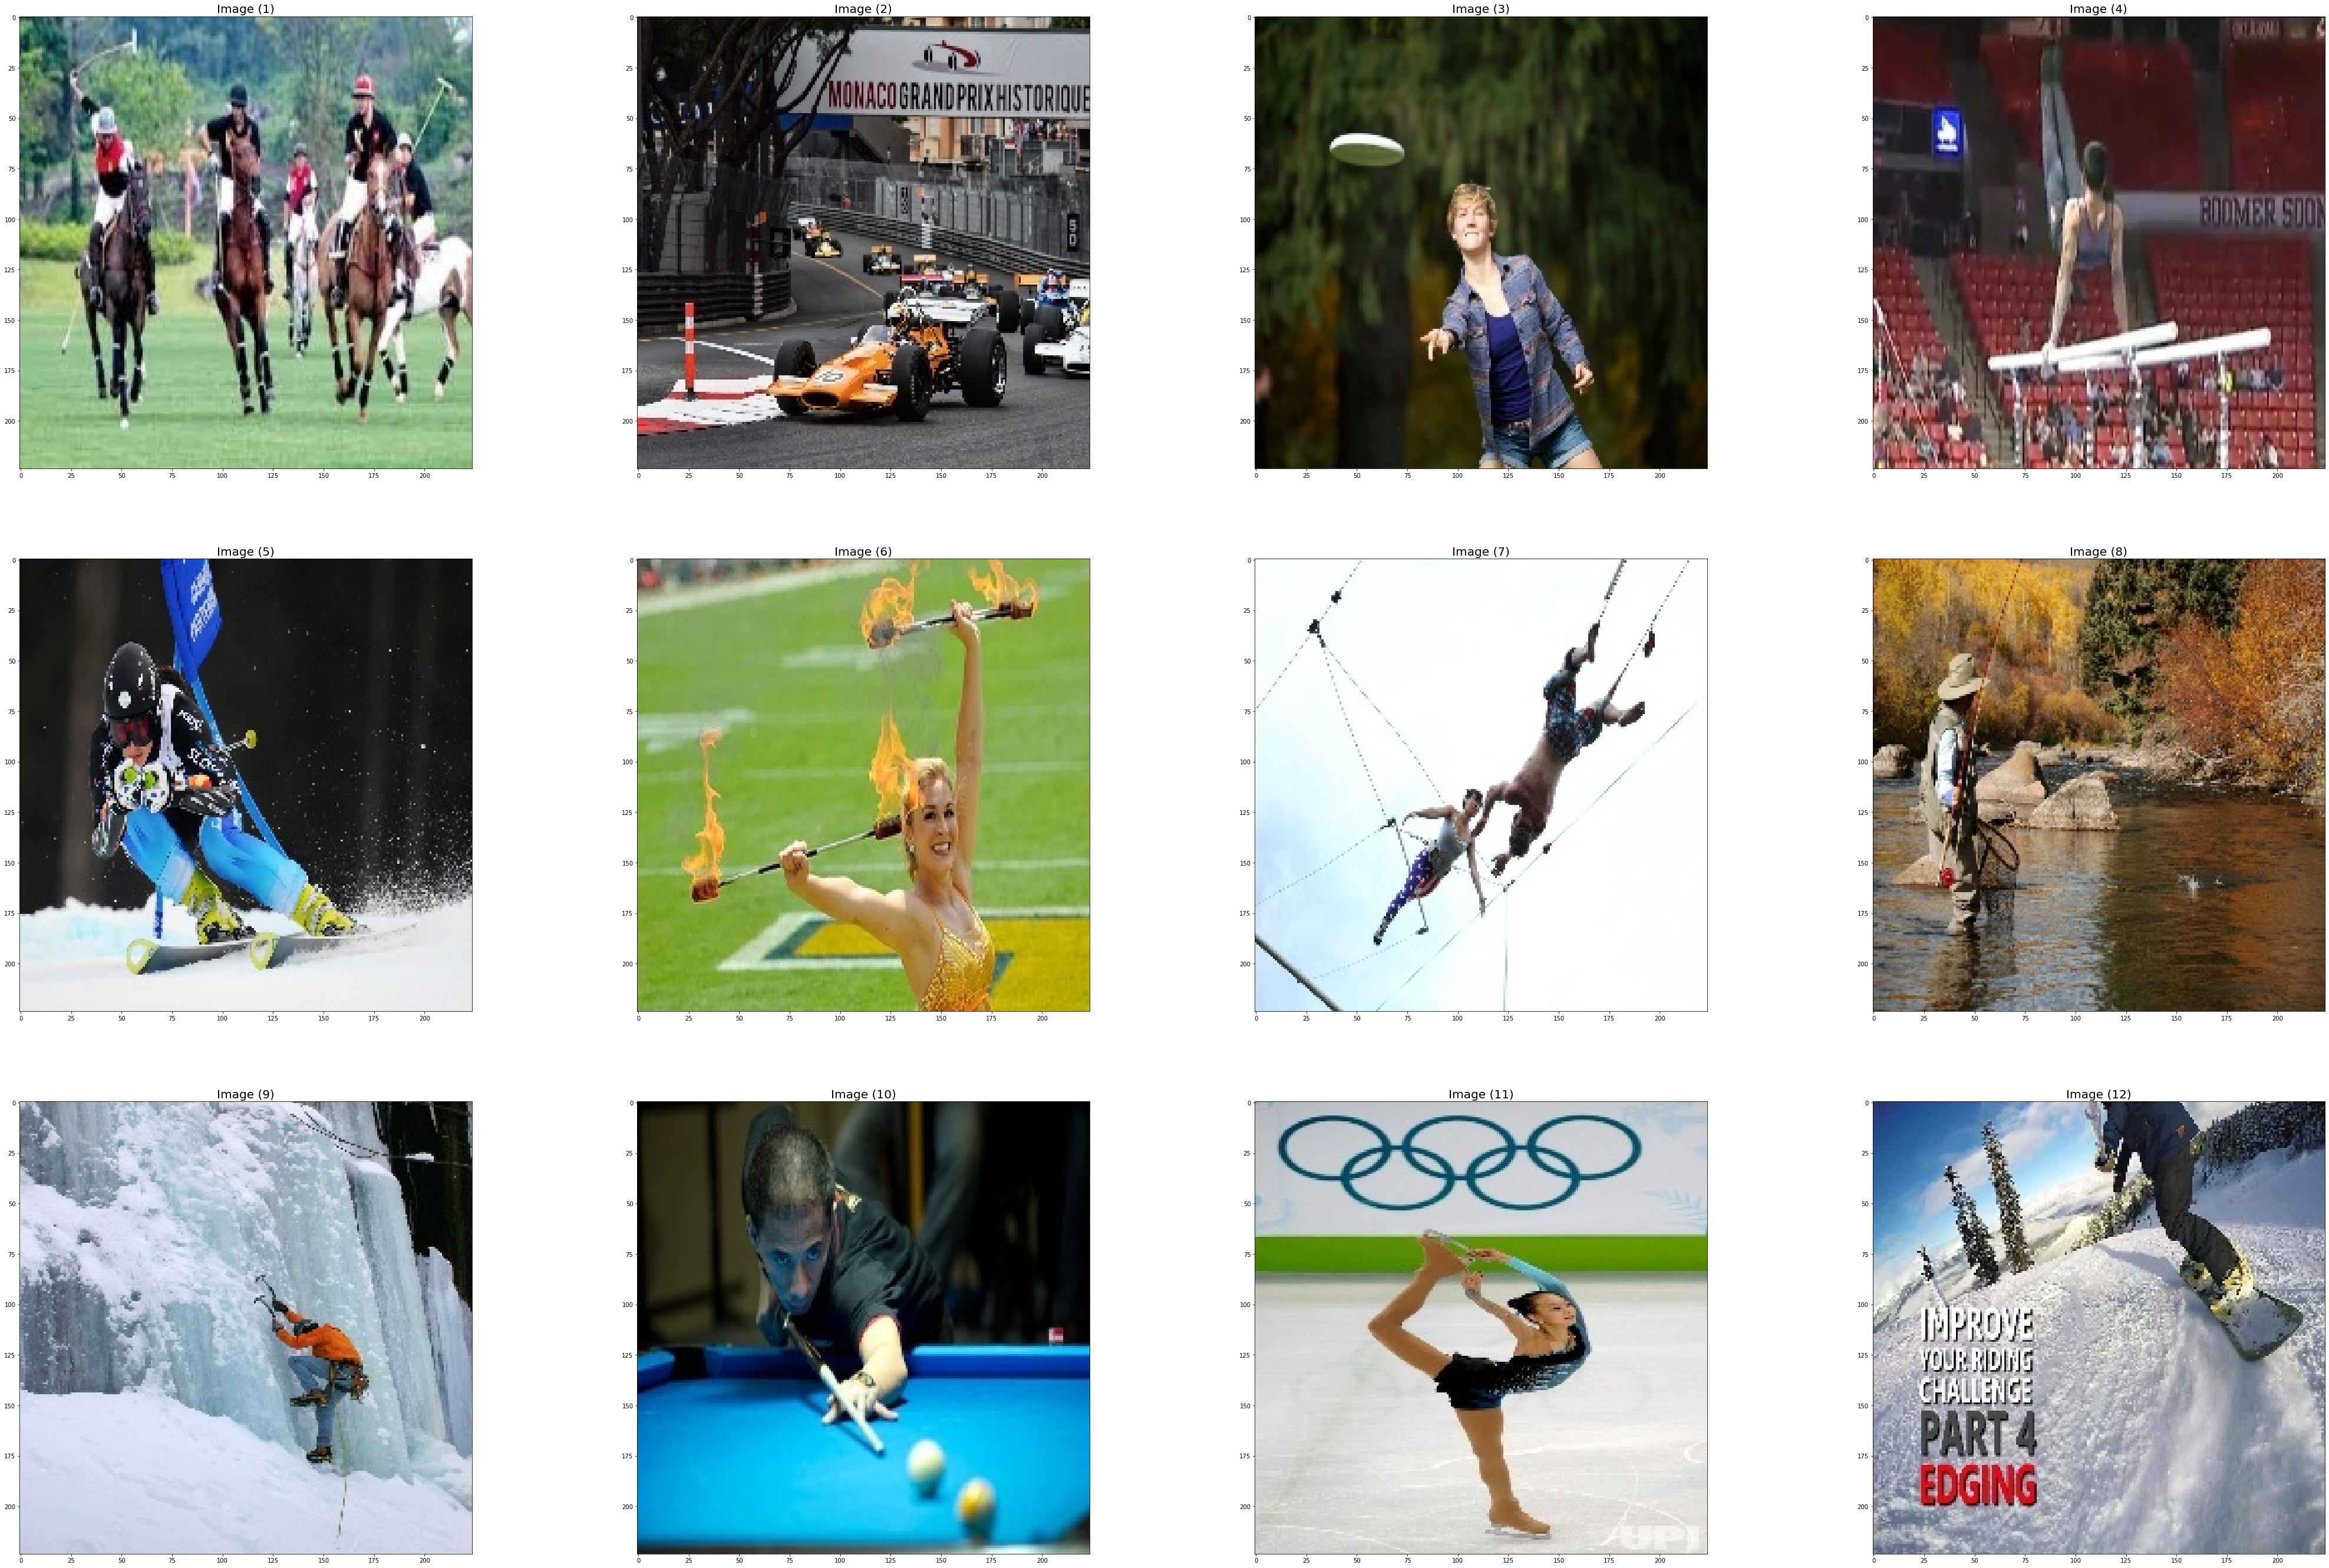

In [11]:
df_image.sample(frac=1).iloc[:12].show_images()

### Labels
* Sports

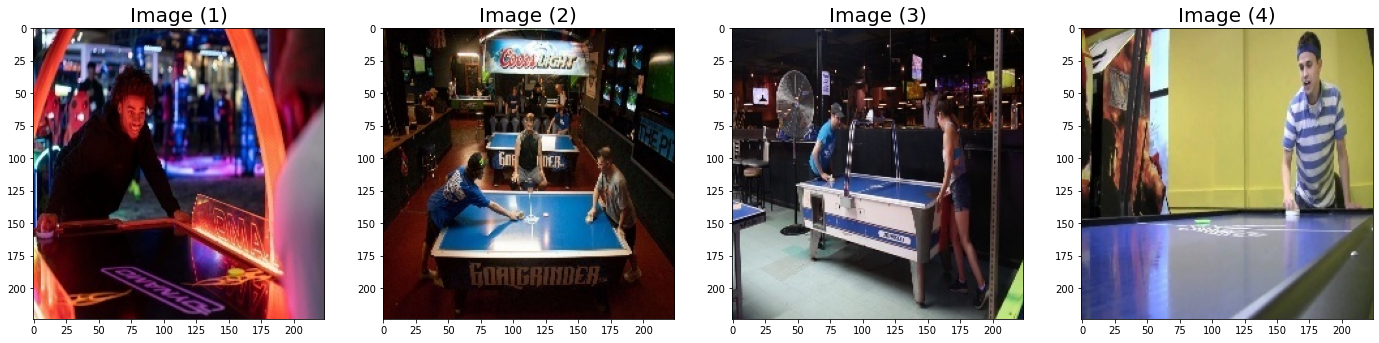

In [12]:
train_dataset.loc[train_dataset['labels']=='air hockey'].iloc[:4].show_images()

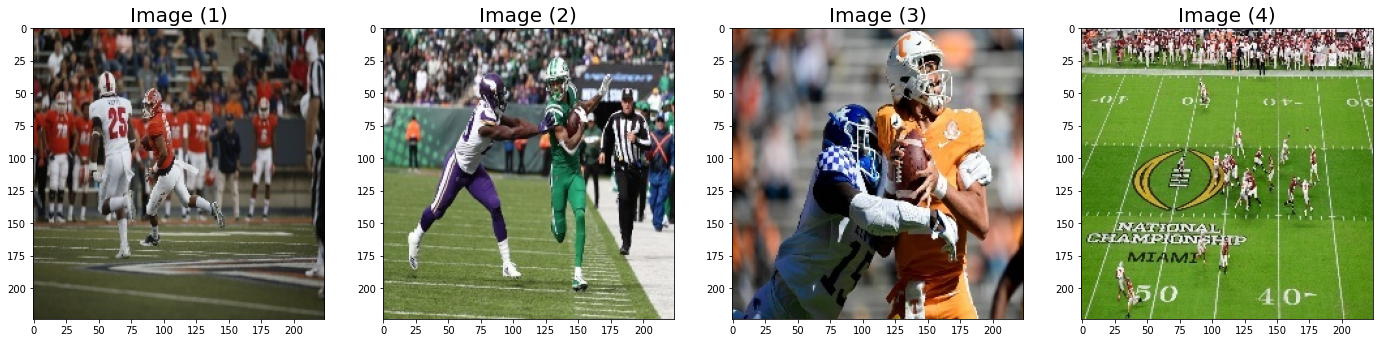

In [13]:
train_dataset.loc[train_dataset['labels']=='football'].iloc[:4].show_images()

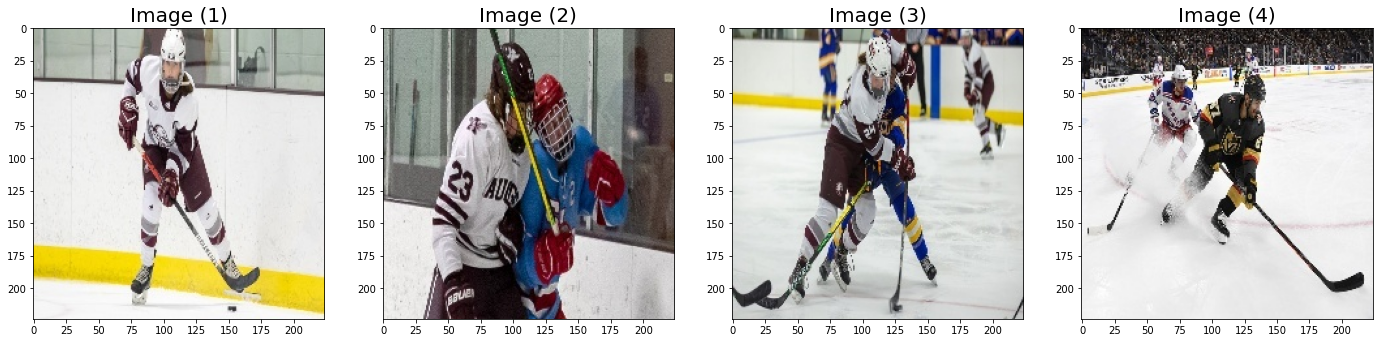

In [14]:
train_dataset.loc[train_dataset['labels']=='hockey'].iloc[:4].show_images()

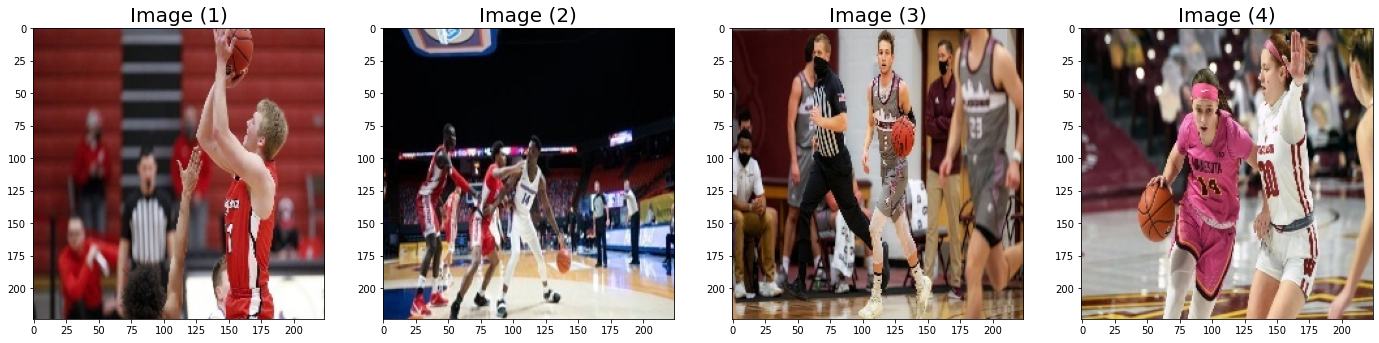

In [15]:
train_dataset.loc[train_dataset['labels']=='basketball'].iloc[:4].show_images()

### Let's use the default config and take a time limit of 5 min.

In [16]:
# Set up the predictor. Mention the label when you call the predictor
predictor = ImagePredictor(label=label)

# Fit the predictor with the train dataset and tune it with the validation dataset. Put a time limit of 5 min.
predictor.fit(train_dataset, time_limit=5*60)  

Reset labels to ['air hockey', 'ampute football', 'archery', 'arm wrestling', 'axe throwing', 'balance beam', 'barell racing', 'baseball', 'basketball', 'baton twirling', 'bike polo', 'billiards', 'bmx', 'bobsled', 'bowling', 'boxing', 'bull riding', 'bungee jumping', 'canoe slamon', 'cheerleading', 'chuckwagon racing', 'cricket', 'croquet', 'curling', 'disc golf', 'fencing', 'field hockey', 'figure skating men', 'figure skating pairs', 'figure skating women', 'fly fishing', 'football', 'formula 1 racing', 'frisbee', 'gaga', 'giant slalom', 'golf', 'hammer throw', 'hang gliding', 'harness racing', 'high jump', 'hockey', 'horse jumping', 'horse racing', 'horseshoe pitching', 'hurdles', 'hydroplane racing', 'ice climbing', 'ice yachting', 'jai alai', 'javelin', 'jousting', 'judo', 'lacrosse', 'log rolling', 'luge', 'motorcycle racing', 'mushing', 'nascar racing', 'olympic wrestling', 'parallel bar', 'pole climbing', 'pole dancing', 'pole vault', 'polo', 'pommel horse', 'rings', 'rock cli

### The default model is resnet50, with the best config printed just above.

In [17]:
# print the train, val accuracy.
fit_result = predictor.fit_summary()
print('Top-1 train acc: %.3f, val acc: %.3f' %(fit_result['train_acc'], fit_result['valid_acc']))

Top-1 train acc: 0.341, val acc: 0.395


In [18]:
# Evaluate the predictor on the test dataset
# set the true values
y_test = test_dataset[label]  
# delete label column to prove we're not cheating
test_data_nolab = test_dataset.drop(columns=[label])  

In [19]:
# predict on the test dataset without label
y_pred = predictor.predict(test_data_nolab)
# evalute your predictions vs the true labels with evaluate_predictions function.
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)
print('Test acc on hold-out data:', results)

AttributeError: 'ImagePredictor' object has no attribute 'evaluate_predictions'

In [ ]:
# print a prediction of one element of the test dataset
image_index = 0
image_path = test_dataset.iloc[image_index]['image']
result = predictor.predict(image_path)
print(result)

### let's have look to test subsample.

In [ ]:
# print some test data images and create a subsample to see the prediction of the images.
test_sample = test_dataset.sample(frac=1).iloc[:4]
test_sample.show_images()

In [ ]:
# print the predictions of the sub sample.
bulk_result = predictor.predict(test_sample)
bulk_result

In [ ]:
# print the true labels.
test_sample.labels

## Let's try specific models

In [ ]:
# print the list of available models.
ImagePredictor.list_models()

In [ ]:
# create your set of model to try.
model = ag.Categorical(['resnet18_v1b', 'mobilenetv3_small']) #'vgg19',,'mobilenetv3_small_100','inception_v3'

In [ ]:
# set up your hyperparameters.
batch_size = 16
lr = ag.Categorical(1e-2, 1e-3)
hyperparameters={ 'batch_size': batch_size, 'lr': lr} #'model': model,

In [ ]:
# set up your predictor
predictor = ImagePredictor()
# fit the predictor with the train dataset, val dataset, the hyperparameters and set a time limit of 5 min.
predictor.fit(train_dataset,
              time_limit=20*60, 
              hyperparameters=hyperparameters,
              #hyperparameter_tune_kwargs={'num_trials': 2}
             )
print('Top-1 val acc: %.3f' % predictor.fit_summary()['valid_acc'])

In [ ]:
# Evaluate the predictor on the test dataset
results = predictor.evaluate(test_dataset)
print('Test acc on hold-out data:', results)

In [ ]:
# Create a new sub sample of the test data set.
test_sample = test_dataset.sample(frac=1).iloc[:4]
test_sample.show_images()

In [ ]:
# print the prediction of this sub sample.
bulk_result = predictor.predict(test_sample)
bulk_result

In [ ]:
# print the true labels.
test_sample.label

# Optional
### Let's see the result with more training time

In [ ]:
# you can try to train your predictor with more time.
hyperparameters={'model': model, 'batch_size': batch_size, 'lr': lr}

predictor = ImagePredictor()
predictor.fit(train_dataset,
              time_limit=2*60*60, 
              hyperparameters=hyperparameters
             )
print('Top-1 val acc: %.3f' % predictor.fit_summary()['valid_acc'])

In [ ]:
# evaluate it
results = predictor.evaluate(test_dataset)
print('Test acc on hold-out data:', results)